In [ ]:
#Steps to do classification using tensorflow
#1. Do the essential imports
#2. get dataset in train, test split
#3. View the dataset stats
#4. Preprocess the dataset
#5. view the small chunk of dataset
#6. build the model
#7. Compile the model
#8. Train the model
#9.Do predictions on test set
#10. View the predictions.

In [2]:
#Step1: Do the essential imports
import tensorflow as tf
import keras
import matplotlib.pyplot as plt


Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
#2. get the train/test split of dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 12s 3us/step


In [4]:
#3.a View the dataset size
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ..., 3 0 5]


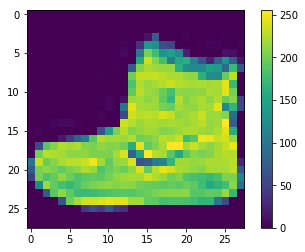

In [18]:
#data view in graphical format
plt.figure()
plt.imshow(train_images[0])#add the image
plt.colorbar()#show color bar on right
plt.gca().grid(False)
plt.show()

In [19]:
#Data preprocessing
train_images = train_images/255.0
test_images  = test_images/255.0

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


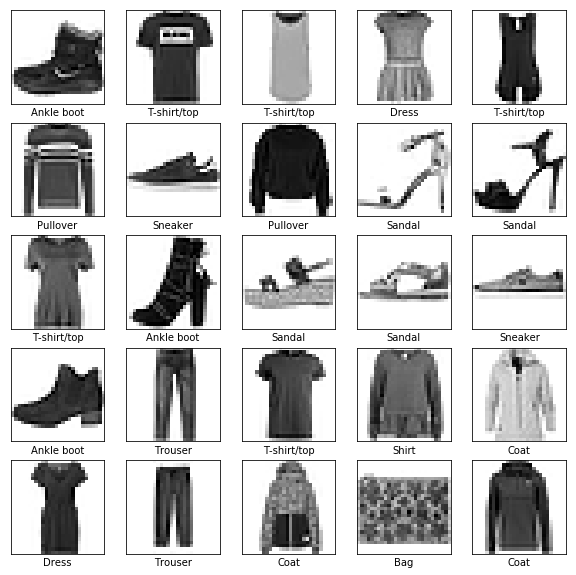

In [27]:
#view the chunk of dataset
%matplotlib inline
plt.figure(figsize=(10, 10))#size of each figure in dataset
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [29]:
#building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [30]:
#model compilation
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
#model training
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.4958 - acc: 0.8268

In [34]:
#check the loss and accuracy on test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Loss is " + str(test_loss))
print("accuracy is " + str(test_accuracy))

10000/10000 [==============================] - 0s 40us/step
Loss is 0.355271069562
accuracy is 0.8718


In [37]:
#make predictions
import numpy as np
predictions = model.predict(test_images)
np.argmax(predictions[0])

9

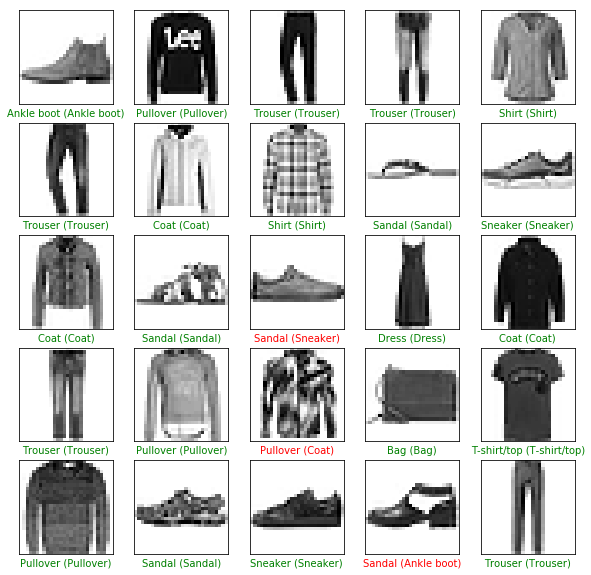

In [43]:
#view the predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    prediction_label = np.argmax(predictions[i])
    true_label       = test_labels[i]
#     print(prediction_label)
#     print(true_label)
    if prediction_label==true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel('{} ({})'.format(class_names[prediction_label], class_names[true_label]), color=color)